 # Math 10 Final Project: Analyzing the weather conditions in 10 locations

Author: Zidong Zhang

Course Project, UC Irvine, Math 10, S24


I would like to post my notebook on the course's website. [Yes]

In [1]:
import pandas as pd
import seaborn as sns
import altair as alt
import numpy as np
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import r2_score

In [2]:

df = pd.read_csv('weather_data.csv')
print(df)



            Location        Date_Time  Temperature_C  Humidity_pct  \
0          San Diego  2024/1/14 21:12      10.683001     41.195754   
1          San Diego  2024/5/17 15:22       8.734140     58.319107   
2          San Diego   2024/5/11 9:30      11.632436     38.820175   
3       Philadelphia  2024/2/26 17:32      -8.628976     54.074474   
4        San Antonio  2024/4/29 13:23      39.808213     72.899908   
...              ...              ...            ...           ...   
999995        Dallas   2024/1/1 20:29      23.416877     37.705024   
999996   San Antonio  2024/1/20 15:59       6.759080     40.731036   
999997      New York   2024/4/14 8:30      15.664465     62.201884   
999998       Chicago  2024/5/12 20:10      18.999994     63.703245   
999999      New York  2024/4/16 16:11      10.725351     43.804584   

        Precipitation_mm  Wind_Speed_kmh  
0               4.020119        8.233540  
1               9.111623       27.715161  
2               4.607511      

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.dtypes

Location             object
Date_Time            object
Temperature_C       float64
Humidity_pct        float64
Precipitation_mm    float64
Wind_Speed_kmh      float64
dtype: object

In [5]:
df.shape

(1000000, 6)

In [6]:
col =df['Location']
print(col)
type(col)

0            San Diego
1            San Diego
2            San Diego
3         Philadelphia
4          San Antonio
              ...     
999995          Dallas
999996     San Antonio
999997        New York
999998         Chicago
999999        New York
Name: Location, Length: 1000000, dtype: object


pandas.core.series.Series

In [7]:
df.Humidity_pct.mean()

60.02182955554013

In [8]:
z = df[0:50]
z

Location        Date_Time  Temperature_C  Humidity_pct  \
0      San Diego  2024/1/14 21:12      10.683001     41.195754   
1      San Diego  2024/5/17 15:22       8.734140     58.319107   
2      San Diego   2024/5/11 9:30      11.632436     38.820175   
3   Philadelphia  2024/2/26 17:32      -8.628976     54.074474   
4    San Antonio  2024/4/29 13:23      39.808213     72.899908   
5      San Diego   2024/1/21 8:54      27.341055     49.023236   
6       San Jose   2024/1/13 2:10       1.881883     65.742325   
7       New York  2024/1/25 19:04      -6.894766     30.804894   
8       New York   2024/3/29 5:20       0.963545     38.819158   
9       San Jose   2024/5/18 9:14      -1.607088     82.198701   
10      New York   2024/3/4 13:47      35.145559     54.752866   
11       Houston   2024/3/7 22:03      15.816764     80.119902   
12        Dallas  2024/2/27 21:07      32.016898     53.194371   
13       Houston    2024/5/9 0:53      38.641269     85.952726   
14       Houston  2024/5/12 15:57      39.666772     72.747026   
15  Philadelphia    2024/3/9 1:51      28.290115     35.239170   
16   San Antonio  2024/2/10 15:05      16.349790     65.812607   
17       Chicago    2024/1/6 2:59      26.786811     31.513614   
18   San Antonio   2024/5/8 16:20      35.179548     35.083071   
19     San Diego   2024/1/31 5:38      14.605819     66.642235   
20     San Diego  2024/1/25 12:59      33.023351     52.607485   
21      New York  2024/2/19 12:26      -7.383811     54.089973   
22   San Antonio   2024/2/14 4:43      30.739684     85.603779   
23      San Jose   2024/4/22 3:13      34.539654     57.793010   
24       Houston   2024/1/11 2:53      -5.236300     58.054296   
25      San Jose   2024/3/5 21:38      -1.733200     47.973206   
26     San Diego  2024/3/27 10:44      24.312724     57.869279   
27   San Antonio   2024/2/8 20:45       3.017951     49.868218   
28      New York   2024/1/4 21:41      14.568328     41.350180   
29   Los Angeles  2024/2/15 20:47      -2.409511     46.834004   
30      New York    2024/2/2 2:17      -2.862063     53.395172   
31        Dallas  2024/2/22 14:16      12.865779     44.725912   
32       Chicago   2024/4/16 0:07      17.587820     32.817923   
33       Houston  2024/2/29 23:17       7.630377     33.523611   
34  Philadelphia   2024/4/20 9:34       0.351373     88.015157   
35        Dallas   2024/3/22 2:34      17.439495     56.210161   
36  Philadelphia  2024/3/16 23:47      23.405681     78.914506   
37       Phoenix   2024/1/29 7:08       1.512627     89.417846   
38       Chicago    2024/4/1 3:12      -2.562660     30.356593   
39      New York  2024/4/21 10:17       8.863086     71.492544   
40        Dallas   2024/4/3 22:07       6.514284     42.006015   
41      New York  2024/2/19 19:53      38.545534     40.450830   
42  Philadelphia   2024/5/18 2:32      -2.015243     36.062193   
43     San Diego  2024/1/24 12:04      -6.853765     84.666780   
44     San Diego   2024/3/3 11:02      35.666565     74.060956   
45       Chicago   2024/4/3 12:07       7.166150     50.377273   
46       Phoenix  2024/3/24 22:44      34.453648     59.576973   
47       Chicago   2024/4/5 13:22      38.386233     74.049712   
48  Philadelphia  2024/3/26 12:45       7.106603     79.177323   
49      San Jose   2024/5/8 20:16      35.097440     40.225820   

    Precipitation_mm  Wind_Speed_kmh  
0           4.020119        8.233540  
1           9.111623       27.715161  
2           4.607511       28.732951  
3           3.183720       26.367303  
4           9.598282       29.898622  
5           9.166543       27.473896  
6           0.221709        1.073112  
7           8.027624       16.848337  
8           3.640129        7.989024  
9           4.101493       25.647282  
10          8.349195       25.430310  
11          3.760004       16.752132  
12          3.552671        3.050196  
13          0.470782       20.779264  
14          1.263722        6.479492  
15          9.347

In [9]:
df[0:2]

Location        Date_Time  Temperature_C  Humidity_pct  Precipitation_mm  \
0  San Diego  2024/1/14 21:12      10.683001     41.195754          4.020119   
1  San Diego  2024/5/17 15:22       8.734140     58.319107          9.111623   

   Wind_Speed_kmh  
0        8.233540  
1       27.715161

In [10]:
df[df['Location']== 'New York']

Location        Date_Time  Temperature_C  Humidity_pct  \
7       New York  2024/1/25 19:04      -6.894766     30.804894   
8       New York   2024/3/29 5:20       0.963545     38.819158   
10      New York   2024/3/4 13:47      35.145559     54.752866   
21      New York  2024/2/19 12:26      -7.383811     54.089973   
28      New York   2024/1/4 21:41      14.568328     41.350180   
...          ...              ...            ...           ...   
999979  New York  2024/1/30 15:04       1.837912     66.505813   
999990  New York   2024/1/1 11:49      20.245916     31.677558   
999991  New York   2024/2/14 3:55       4.210758     45.683075   
999997  New York   2024/4/14 8:30      15.664465     62.201884   
999999  New York  2024/4/16 16:11      10.725351     43.804584   

        Precipitation_mm  Wind_Speed_kmh  
7               8.027624       16.848337  
8               3.640129        7.989024  
10              8.349195       25.430310  
21              1.905731        6.637064  
28              3.342765        4.781286  
...                  ...             ...  
999979          4.934130        4.797305  
999990          9.801482       24.029331  
999991          2.053384       22.351735  
999997          3.987558        0.403909  
999999          1.883292       15.363828  

[99972 rows x 6 columns]

In [11]:
df.loc[0:50,['Location','Temperature_C']]

Location  Temperature_C
0      San Diego      10.683001
1      San Diego       8.734140
2      San Diego      11.632436
3   Philadelphia      -8.628976
4    San Antonio      39.808213
5      San Diego      27.341055
6       San Jose       1.881883
7       New York      -6.894766
8       New York       0.963545
9       San Jose      -1.607088
10      New York      35.145559
11       Houston      15.816764
12        Dallas      32.016898
13       Houston      38.641269
14       Houston      39.666772
15  Philadelphia      28.290115
16   San Antonio      16.349790
17       Chicago      26.786811
18   San Antonio      35.179548
19     San Diego      14.605819
20     San Diego      33.023351
21      New York      -7.383811
22   San Antonio      30.739684
23      San Jose      34.539654
24       Houston      -5.236300
25      San Jose      -1.733200
26     San Diego      24.312724
27   San Antonio       3.017951
28      New York      14.568328
29   Los Angeles      -2.409511
30      New York      -2.862063
31        Dallas      12.865779
32       Chicago      17.587820
33       Houston       7.630377
34  Philadelphia       0.351373
35        Dallas      17.439495
36  Philadelphia      23.405681
37       Phoenix       1.512627
38       Chicago      -2.562660
39      New York       8.863086
40        Dallas       6.514284
41      New York      38.545534
42  Philadelphia      -2.015243
43     San Diego      -6.853765
44     San Diego      35.666565
45       Chicago       7.166150
46       Phoenix      34.453648
47       Chicago      38.386233
48  Philadelphia       7.106603
49      San Jose      35.097440
50     San Diego      -5.855824

In [12]:
df.loc[:30,'Humidity_pct':'Wind_Speed_kmh']

Humidity_pct  Precipitation_mm  Wind_Speed_kmh
0      41.195754          4.020119        8.233540
1      58.319107          9.111623       27.715161
2      38.820175          4.607511       28.732951
3      54.074474          3.183720       26.367303
4      72.899908          9.598282       29.898622
5      49.023236          9.166543       27.473896
6      65.742325          0.221709        1.073112
7      30.804894          8.027624       16.848337
8      38.819158          3.640129        7.989024
9      82.198701          4.101493       25.647282
10     54.752866          8.349195       25.430310
11     80.119902          3.760004       16.752132
12     53.194371          3.552671        3.050196
13     85.952726          0.470782       20.779264
14     72.747026          1.263722        6.479492
15     35.239170          9.347205       14.066765
16     65.812607          0.109090        6.597039
17     31.513614          0.496024       22.980095
18     35.083071          9.597294        4.507863
19     66.642235          1.515637       29.431890
20     52.607485          0.212143       16.733325
21     54.089973          1.905731        6.637064
22     85.603779          9.250559       24.375952
23     57.793010          3.583560       13.044745
24     58.054296          4.072880       24.754053
25     47.973206          7.066381        3.430741
26     57.869279          9.693766       23.947188
27     49.868218          6.906614        6.212008
28     41.350180          3.342765        4.781286
29     46.834004          4.550643        7.437357
30     53.395172          5.473387       28.519430

In [13]:
df.iloc[0:3,0:3]

Location        Date_Time  Temperature_C
0  San Diego  2024/1/14 21:12      10.683001
1  San Diego  2024/5/17 15:22       8.734140
2  San Diego   2024/5/11 9:30      11.632436

In [14]:
df.describe()

Temperature_C    Humidity_pct  Precipitation_mm  Wind_Speed_kmh
count  1000000.000000  1000000.000000    1000000.000000  1000000.000000
mean        14.779705       60.021830          5.109639       14.997598
std         14.482558       17.324022          2.947997        8.663556
min        -19.969311       30.000009          0.000009        0.000051
25%          2.269631       45.008500          2.580694        7.490101
50%         14.778002       60.018708          5.109917       14.993777
75%         27.270489       75.043818          7.613750       22.514110
max         39.999801       89.999977         14.971583       29.999973

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [16]:
a =df.dropna(thresh=6)

In [17]:
a

Location        Date_Time  Temperature_C  Humidity_pct  \
0          San Diego  2024/1/14 21:12      10.683001     41.195754   
1          San Diego  2024/5/17 15:22       8.734140     58.319107   
2          San Diego   2024/5/11 9:30      11.632436     38.820175   
3       Philadelphia  2024/2/26 17:32      -8.628976     54.074474   
4        San Antonio  2024/4/29 13:23      39.808213     72.899908   
...              ...              ...            ...           ...   
999995        Dallas   2024/1/1 20:29      23.416877     37.705024   
999996   San Antonio  2024/1/20 15:59       6.759080     40.731036   
999997      New York   2024/4/14 8:30      15.664465     62.201884   
999998       Chicago  2024/5/12 20:10      18.999994     63.703245   
999999      New York  2024/4/16 16:11      10.725351     43.804584   

        Precipitation_mm  Wind_Speed_kmh  
0               4.020119        8.233540  
1               9.111623       27.715161  
2               4.607511       28.732951  
3               3.183720       26.367303  
4               9.598282       29.898622  
...                  ...             ...  
999995          3.819833       16.538119  
999996          8.182785       29.005558  
999997          3.987558        0.403909  
999998          4.294325        6.326036  
999999          1.883292       15.363828  

[1000000 rows x 6 columns]

In [18]:
top_five = df['Location'].value_counts().head(5)

In [19]:
top = top_five.index.values

In [20]:
top

array(['Phoenix', 'Chicago', 'Philadelphia', 'Houston', 'New York'],
      dtype=object)

In [21]:
cf = df[df['Location'].isin(top)]
cf

Location        Date_Time  Temperature_C  Humidity_pct  \
3       Philadelphia  2024/2/26 17:32      -8.628976     54.074474   
7           New York  2024/1/25 19:04      -6.894766     30.804894   
8           New York   2024/3/29 5:20       0.963545     38.819158   
10          New York   2024/3/4 13:47      35.145559     54.752866   
11           Houston   2024/3/7 22:03      15.816764     80.119902   
...              ...              ...            ...           ...   
999990      New York   2024/1/1 11:49      20.245916     31.677558   
999991      New York   2024/2/14 3:55       4.210758     45.683075   
999997      New York   2024/4/14 8:30      15.664465     62.201884   
999998       Chicago  2024/5/12 20:10      18.999994     63.703245   
999999      New York  2024/4/16 16:11      10.725351     43.804584   

        Precipitation_mm  Wind_Speed_kmh  
3               3.183720       26.367303  
7               8.027624       16.848337  
8               3.640129        7.989024  
10              8.349195       25.430310  
11              3.760004       16.752132  
...                  ...             ...  
999990          9.801482       24.029331  
999991          2.053384       22.351735  
999997          3.987558        0.403909  
999998          4.294325        6.326036  
999999          1.883292       15.363828  

[500543 rows x 6 columns]

In [22]:
alt.data_transformers.disable_max_rows()


DataTransformerRegistry.enable('default')

In [23]:
columns = ['Temperature_C','Humidity_pct','Precipitation_mm','Wind_Speed_kmh']

d1 = alt.Chart(a[0:1000]).mark_bar().encode(x  ='Location',y ='Humidity_pct',color = 'Location')

d2 = alt.Chart(cf[0:1000]).mark_point().encode(x  ='Temperature_C',y ='Humidity_pct',color = 'Location')

d3 = alt.Chart(cf[0:1000]).mark_point().encode(x  ='Temperature_C',y ='Precipitation_mm',color = 'Location')

d4 = alt.Chart(cf[0:1000]).mark_point().encode(x  ='Temperature_C',y ='Wind_Speed_kmh',color = 'Location')

In [24]:
d1|d2|d3|d4

alt.HConcatChart(...)

The picture shows that from the first 1000 data and analyze, it shows the bar charta and point chart. It shwos that the relationship between the temperature and humidity, precipitaion and wind speed. We can see that Chicago and New York are moister than other location.

# Logistic Regression

In [25]:
lg = LogisticRegression()

lg.fit(cf[columns],cf['Location'])

LogisticRegression()

In [26]:
 lg.predict(cf[columns])

array(['Houston', 'Phoenix', 'Houston', ..., 'New York', 'Philadelphia',
       'Houston'], dtype=object)

In [27]:
lg.score(cf[columns],cf['Location'])

0.22513350501355528

In [28]:
lg.coef_

array([[ 2.06782623e-03,  1.62776332e-04, -2.39521432e-02,
         1.23933356e-04],
       [ 1.74647013e-03, -2.58646999e-04, -2.46208594e-02,
         3.75893962e-07],
       [ 2.08240756e-03,  8.82963083e-06, -2.51033553e-02,
         5.98420218e-06],
       [ 2.19137751e-03,  1.58940926e-05, -2.33413604e-02,
         1.04776813e-05],
       [-8.08808143e-03,  7.11469430e-05,  9.70177183e-02,
        -1.40771133e-04]])

In [29]:
lg.classes_

array(['Chicago', 'Houston', 'New York', 'Philadelphia', 'Phoenix'],
      dtype=object)

In [30]:
lg.intercept_

array([ 0.0930484 ,  0.12760107,  0.10777946,  0.09835607, -0.42678501])

I use code to calculate the logistic Regression Coefficients, intercepts and the score. 

In [31]:
Q = d1.mark_bar().encode()

In [32]:
print(Q)

alt.Chart(...)


In [33]:
Q

alt.Chart(...)

# Cross Validation

In [34]:
features = ['Precipitation_mm']
target = ['Wind_Speed_kmh']
df.dropna(subset=features + target, inplace=True)

In [35]:
model = LinearRegression()
kf =KFold(n_splits=5,shuffle=True,random_state=1)
scores = []
k = 1

for train_index, test_index in kf.split(df):
    X_train, X_test = df[features].iloc[train_index], df[features].iloc[test_index]
    y_train, y_test = df[target].iloc[train_index], df[target].iloc[test_index]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test,y_pred)
    scores.append(score)
    k += 1
    print(f"Fold {k-1} R^2 score:",score)
    
print('Average R^2 score:',np.mean(scores))

Fold 1 R^2 score: 1.945889039789428e-06
Fold 2 R^2 score: 1.5445602918884305e-07
Fold 3 R^2 score: -5.1999608152719645e-06
Fold 4 R^2 score: -1.3250731167646634e-05
Fold 5 R^2 score: -1.3370042832638873e-05
Average R^2 score: -5.94407794931584e-06


In this case, I calculate the Fold 1,2,3,4,5 and use cross validation to find the mean scores.

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [37]:
features = ['Precipitation_mm','Wind_Speed_kmh']
label = 'Location'
df.dropna(subset=features + [label], inplace=True)

In [38]:
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

X= df[features]
y= df[label]

In [39]:
label_encoder = LabelEncoder()
df[label] = label_encoder.fit_transform(df[label])

X = df[features]
y = df[label]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X,y)

y_pred = model.predict(X)
accuracy = accuracy_score(y,y_pred)
print('Accuracy:',accuracy)

print(y_pred)

Accuracy: 0.111441
[9 6 3 ... 7 7 9]


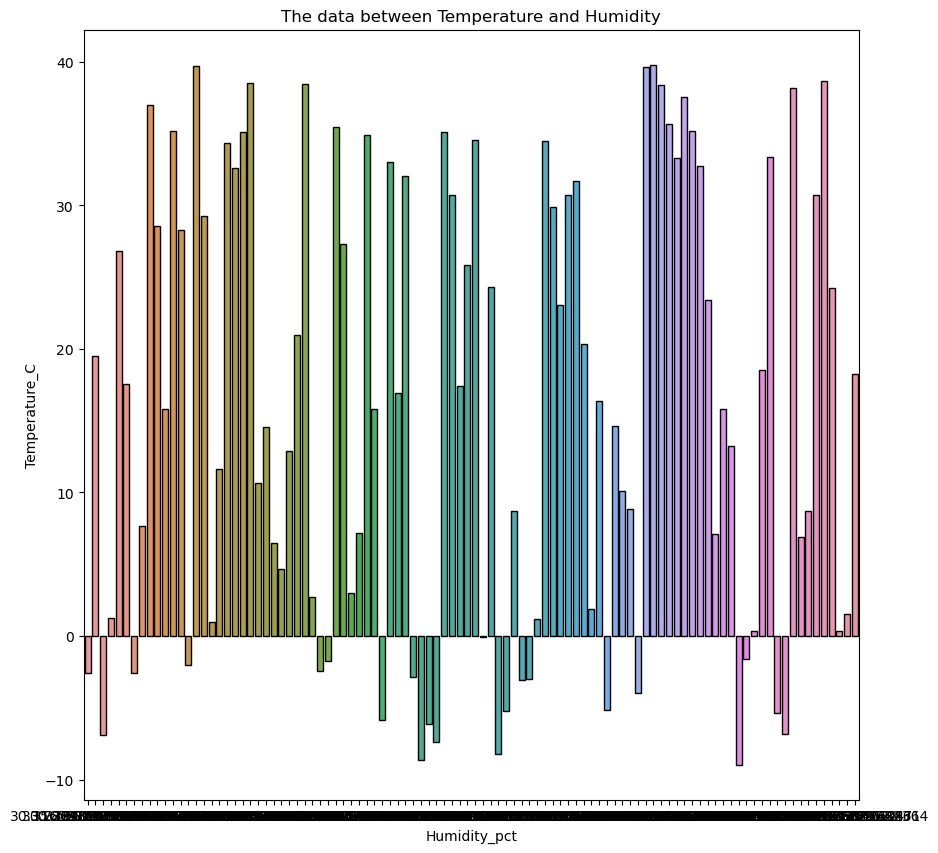

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(x='Humidity_pct',y='Temperature_C',data=df[0:100],errorbar= None,edgecolor= 'black')

plt.title('The data between Temperature and Humidity')
print()

# Extra: using Naive Bayes Classifier and compare the data

In [41]:
 from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [42]:


model_1 = GaussianNB()

model_1.fit(X_train,y_train)

GaussianNB()

In [43]:
model_1.score(X_test,y_test)

0.111875

In [44]:
y_p = model_1.predict(X_test)
print(y_p)


[7 1 7 ... 7 6 6]


In [45]:
min(y_p)

0

In [46]:
max(y_p)

9

In [47]:
m = np.mean(y_p)
print(m)

4.287705


In [48]:
f1 = np.std(y_p)
print(f1)

2.546544881398127


In [49]:
accuracy = accuracy_score(y_test,y_p)

In [50]:
print(accuracy)

0.111875


In [51]:
model_1.fit(X,y)

GaussianNB()

In [52]:
model_1.score(X,y)

0.111734

In [53]:
y_n = model_1.predict(X)
print(y_n)

[9 6 8 ... 7 7 9]


In [54]:
accuracy_n = accuracy_score(y,y_n)

In [55]:
print(accuracy_n)

0.111734


In [56]:
max(y_n)

9

In [57]:
min(y_n)

0

In [58]:
n = np.mean(y_n)
print(n)

5.848463


In [59]:
f = np.std(y_n)
print(f)

2.7098670701034395


In [60]:
max(m,n)

5.848463

In [61]:
max(f1,f)

2.7098670701034395

# Reference


This is the website: https://www.kaggle.com/datasets/prasad22/weather-data

Some resources about Naive Bayes Classifer: 
https://www.geeksforgeeks.org/naive-bayes-classifiers/


https://scikit-learn.org/stable/modules/naive_bayes.html